# Final Project
**Task**: Construct a system to classify news articles into different categories based on their content

Source: https://www.kaggle.com/datasets/rmisra/news-category-dataset
- JSON file containing a list of news articles with their headlines, short descriptions, and assigned categories

Data Preparation
- Preprocess the data, which might involve removing stop words, special characters, or HTML tags, and converting text to lowercase
- Split the dataset into training and testing sets to evaluate the model's performance
- Perform tokenization and/or stemming/lemmatization to further process the text

Feature Extraction
- Extract relevant features from the text data that can help distinguish between different categories of news articles. Some possibilities include:
    - Bag o' words or TF-IDF representation of the text
    - Sentiment analysis scores
    - Presence of specific keywords or phrases
    - Readability scores

Model Training and Evaluation
- Apply text mining techniques to automatically categorize news articles based on their content:
    - Topic modeling: Use algorithms such as Latent Dirichlet Allocation to discover underlying topics in the news articles and assign each article to one or more topics
    - Clustering: Apply algorithms like K-means to group news articles into clusters based on their textual features, and then assign category labels to each cluster
    - Classification: Train models (e.g., logistic regression, naive Bayes, support vector machines, deep learning models, etc.) to predict the category labels of news articles based on their textual features
- Evaluate the performance of the models or techniques using metrics such as accuracy, precision, recall, F1-score, or silouhette score for clustering
- Perform hyperparameter tuning and feature selection to optimize the final model's performance

This project can be useful for news aggregators, media companies, and researchers who need to categorize and analyze a large volume of news articles. By automating the classification process, they can save time and resources, ensure consistency in categorization, and better understand the distribution and trends of news topics. This can ultimately help improve the user experience, optimize content curation, and support various research efforts.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm
tqdm.pandas()
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

---

## Data Preparation

In [2]:
df = pd.read_json("News_Category_Dataset_v3.json", lines=True)

In [3]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [4]:
# Get the counts of each category
category_counts = df['category'].value_counts()

# Print the counts
print(category_counts)

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

Group similar categories together

In [5]:
# Define a dictionary mapping the old categories to the new ones
category_mapping = {
    'ARTS': 'CULTURE & ARTS',
    'ARTS & CULTURE': 'CULTURE & ARTS',
    'HEALTHY LIVING': 'WELLNESS',
    'FIFTY': 'WELLNESS',
    'BLACK VOICES': 'DIVERSE VOICES',
    'LATINO VOICES': 'DIVERSE VOICES',
    'BUSINESS': 'FINANCE',
    'MONEY': 'FINANCE',
    'SCIENCE': 'SCIENCE & TECH',
    'TECH': 'SCIENCE & TECH',
    'STYLE': 'STYLE & BEAUTY',
    'GREEN':  'ENVIRONMENT',
    'TASTE': 'FOOD & DRINK',
    'COLLEGE': 'EDUCATION',
    'PARENTS': 'PARENTING',
    'THE WORLDPOST': 'WORLD NEWS',
    'MEDIA': 'MISCELLANEOUS',
    'WEIRD NEWS': 'MISCELLANEOUS',
    'GOOD NEWS': 'MISCELLANEOUS',
    'IMPACT': 'MISCELLANEOUS'
}

# Replace the old categories with the new ones
df['category'] = df['category'].replace(category_mapping)

In [6]:
# Get the counts of each category
category_counts = df['category'].value_counts()

# Print the counts
print(category_counts)

POLITICS          35602
WELLNESS          26040
ENTERTAINMENT     17362
PARENTING         12746
STYLE & BEAUTY    12068
MISCELLANEOUS     10603
TRAVEL             9900
FOOD & DRINK       8436
FINANCE            7748
WORLD NEWS         6963
QUEER VOICES       6347
DIVERSE VOICES     5713
COMEDY             5400
SPORTS             5077
HOME & LIVING      4320
SCIENCE & TECH     4310
ENVIRONMENT        4066
CULTURE & ARTS     3922
WEDDINGS           3653
WOMEN              3572
CRIME              3562
DIVORCE            3426
WORLDPOST          2579
RELIGION           2577
EDUCATION          2158
U.S. NEWS          1377
Name: category, dtype: int64


After grouping, limit the number of catgeories we want to work with to a select few and balance the data to match the smallest category

In [7]:
# Define the categories to keep
selected_categories = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'PARENTING', 'STYLE & BEAUTY', 'TRAVEL', 'FOOD & DRINK', 'FINANCE', 'SPORTS', 'SCIENCE & TECH']

# Filter the datframe based on the selected categories
filtered_df = df[df['category'].isin(selected_categories)]

In [8]:
min_samples = filtered_df['category'].value_counts().min() # Minimum number of samples

# Create a new df with balanced data
balanced_df = pd.DataFrame()

for category in filtered_df['category'].unique():
    category_df = filtered_df[filtered_df['category'] == category]
    resampled_category_df = resample(category_df, 
                                     replace=False, 
                                     n_samples=min_samples, 
                                     random_state=22)
    balanced_df = pd.concat([balanced_df, resampled_category_df])

In [9]:
# Get the counts of each category
category_counts = balanced_df['category'].value_counts()

# Print the counts
print(category_counts)

PARENTING         4310
SCIENCE & TECH    4310
SPORTS            4310
ENTERTAINMENT     4310
POLITICS          4310
WELLNESS          4310
FINANCE           4310
STYLE & BEAUTY    4310
FOOD & DRINK      4310
TRAVEL            4310
Name: category, dtype: int64


In [10]:
balanced_df['text'] = balanced_df['headline'] + ' ' + balanced_df['short_description'] # Combine headline and description into one text

In [11]:
balanced_df['text'] = balanced_df['text'].apply(lambda x: x.lower())

In [12]:
balanced_df['text']

137869    your essential guide to the all-time best movi...
196662    nail biting defiance is an alien concept in a ...
138       this breastfeeding condition makes moms feel d...
151605    new findings: discipline, don't punish our pro...
116729    the extreme measures we're taking to try to sa...
                                ...                        
43796     nevis, alexander hamilton's home island, shoul...
136936    how to find a quiet place to relax in a crowde...
153967    oahu's north shore sees early swell oahu's nor...
144848    instagrammers explore real life middle earth j...
134580    nine neolithic wonders of orkney so, to get yo...
Name: text, Length: 43100, dtype: object

In [13]:
train, test = train_test_split(balanced_df, test_size=0.2, random_state=22)

In [14]:
train = train[["text", "category"]]
test = test[["text", "category"]]

In [15]:
n_train = 10000
n_test = 5000

train = resample(
    train,
    replace=False,
    n_samples=n_train,
    stratify=train["category"],
    random_state=999,
)
test = resample(
    test, replace=False, n_samples=n_test, stratify=test["category"], random_state=22
)

In [16]:
test

,text,category
27964,"with 'the glass castle,' jeannette walls goes ...",ENTERTAINMENT
69085,senators fight for a vote on campus rape bill ...,POLITICS
152905,"kate moss gets her own single, 'day and all ni...",STYLE & BEAUTY
180219,a little apple goes a long way the company is ...,SCIENCE & TECH
113307,5 exciting startups to inspire any entrepreneu...,FINANCE
...,...,...
199519,"it's not porn, people, it's food can we look a...",PARENTING
100247,a picture postcard from table mountain nationa...,TRAVEL
204195,how to make dc mumbo sauce (or is it really ch...,FOOD & DRINK
187919,are you ready and willing to play the money ga...,FINANCE


In [17]:
train

,text,category
86204,culture is the winning ingredient that's chang...,SPORTS
143673,5 goals for improving your wellness in 2014 fo...,WELLNESS
101588,apparently there's a 'right way' to sauce your...,FOOD & DRINK
91905,stephen colbert 'prays' trump stays in preside...,ENTERTAINMENT
116320,holy flow parenting holy flow parenting for me...,PARENTING
...,...,...
23790,roy moore win means gop civil war? please. ric...,FINANCE
15240,james corden reveals how hillary clinton's gra...,ENTERTAINMENT
160207,york: a city of many dimensions york is arguab...,TRAVEL
59446,katie ledecky breaks her own world record for ...,SPORTS


Now we have a train set with 10000 rows and a test set with 5000 rows

---

## Random baseline

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, f1_score

In [19]:
dummy = DummyClassifier()
dummy.fit(train["text"], train["category"])
print(classification_report(test["category"], dummy.predict(test["text"])))

                precision    recall  f1-score   support

 ENTERTAINMENT       0.00      0.00      0.00       517
       FINANCE       0.00      0.00      0.00       517
  FOOD & DRINK       0.00      0.00      0.00       505
     PARENTING       0.00      0.00      0.00       513
      POLITICS       0.00      0.00      0.00       507
SCIENCE & TECH       0.00      0.00      0.00       492
        SPORTS       0.00      0.00      0.00       487
STYLE & BEAUTY       0.10      1.00      0.18       483
        TRAVEL       0.00      0.00      0.00       485
      WELLNESS       0.00      0.00      0.00       494

      accuracy                           0.10      5000
     macro avg       0.01      0.10      0.02      5000
  weighted avg       0.01      0.10      0.02      5000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tokenize the text

In [20]:
import spacy

nlp = spacy.load(
    "en_core_web_sm",
    exclude=["tagger", "parser", "ner", "lemmatizer", "attribute_ruler"],
)


def tokenize(text):
    doc = nlp.tokenizer(text)
    return [t.norm_ for t in doc if not (t.is_space or t.is_punct or t.like_num)]

In [21]:
train["tokens"] = train["text"].progress_apply(tokenize)
test["tokens"] = test["text"].progress_apply(tokenize)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

---

## Linear classifier

In [22]:
from scipy.stats.distributions import loguniform
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
sgd = make_pipeline(CountVectorizer(analyzer=identity), SGDClassifier(random_state=22))
sgd.fit(train["tokens"], train["category"])
print(classification_report(test["category"], sgd.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.6114    0.6634    0.6364       517
       FINANCE     0.6296    0.4932    0.5531       517
  FOOD & DRINK     0.6907    0.7960    0.7397       505
     PARENTING     0.6947    0.6608    0.6773       513
      POLITICS     0.7311    0.7456    0.7383       507
SCIENCE & TECH     0.5769    0.6098    0.5929       492
        SPORTS     0.7004    0.7967    0.7454       487
STYLE & BEAUTY     0.7707    0.7308    0.7503       483
        TRAVEL     0.7335    0.6186    0.6711       485
      WELLNESS     0.5771    0.5911    0.5840       494

      accuracy                         0.6700      5000
     macro avg     0.6716    0.6706    0.6688      5000
  weighted avg     0.6711    0.6700    0.6683      5000



In [24]:
%%time

search = RandomizedSearchCV(
    sgd,
    {
        "sgdclassifier__average": [True, False],
        "sgdclassifier__alpha": loguniform(1e-7, 1.0),
        "sgdclassifier__loss": ['hinge', 'log_loss']
    },
    n_iter=20,
    n_jobs=-1,
    scoring="f1_weighted",
)

search.fit(train["tokens"], train["category"])
search.best_score_, search.best_params_

CPU times: user 7.47 s, sys: 248 ms, total: 7.71 s
Wall time: 26.5 s


(0.7100875922328668,
 {'sgdclassifier__alpha': 0.0018346182714086019,
  'sgdclassifier__average': True,
  'sgdclassifier__loss': 'hinge'})

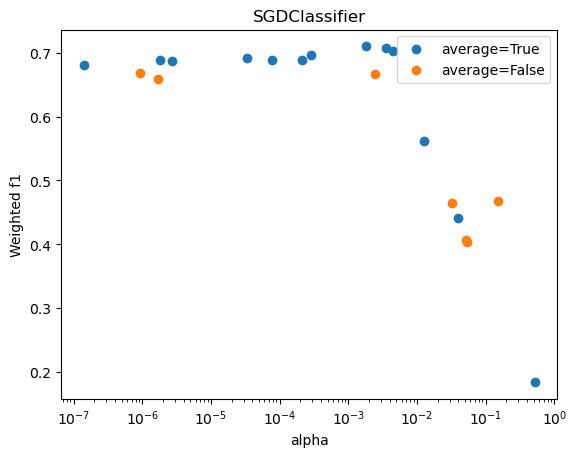

In [25]:
cv_results = pd.DataFrame(search.cv_results_)
plt.scatter(
    cv_results.query("param_sgdclassifier__average==True")[
        "param_sgdclassifier__alpha"
    ],
    cv_results.query("param_sgdclassifier__average==True")["mean_test_score"],
    label="average=True",
)
plt.scatter(
    cv_results.query("param_sgdclassifier__average==False")[
        "param_sgdclassifier__alpha"
    ],
    cv_results.query("param_sgdclassifier__average==False")["mean_test_score"],
    label="average=False",
)
plt.semilogx()
plt.title("SGDClassifier")
plt.xlabel("alpha")
plt.ylabel("Weighted f1")
plt.legend()
plt.show()

In [26]:
sgd.set_params(**search.best_params_)
sgd.fit(train["tokens"], train["category"])
print(classification_report(test["category"], sgd.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.6941    0.6364    0.6640       517
       FINANCE     0.6607    0.5725    0.6135       517
  FOOD & DRINK     0.7600    0.7901    0.7748       505
     PARENTING     0.6825    0.7544    0.7167       513
      POLITICS     0.7363    0.7929    0.7635       507
SCIENCE & TECH     0.6674    0.6037    0.6339       492
        SPORTS     0.7582    0.8049    0.7809       487
STYLE & BEAUTY     0.7926    0.7516    0.7715       483
        TRAVEL     0.7180    0.7402    0.7289       485
      WELLNESS     0.5981    0.6296    0.6134       494

      accuracy                         0.7070      5000
     macro avg     0.7068    0.7076    0.7061      5000
  weighted avg     0.7064    0.7070    0.7056      5000



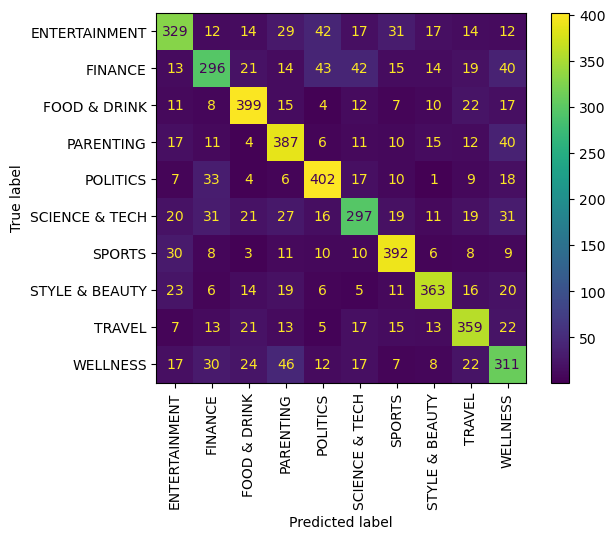

In [27]:
ConfusionMatrixDisplay.from_estimator(
    sgd, test["tokens"], test["category"], xticks_rotation=90
)

----

## fasttext vectorizer

In [28]:
import fasttext
from sklearn.base import BaseEstimator, TransformerMixin

In [29]:
try:
    cc_model
except NameError:
    cc_model = fasttext.load_model("/data/cc.en.100.bin")

In [30]:
class FasttextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        sentences = [" ".join(tokens) for tokens in X]
        return np.vstack([cc_model.get_sentence_vector(sentence) for sentence in sentences])

In [31]:
sgd_vec = make_pipeline(FasttextVectorizer(), SGDClassifier(random_state=22))
sgd_vec.fit(train["tokens"], train["category"])
print(classification_report(test["category"], sgd_vec.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.7774    0.4797    0.5933       517
       FINANCE     0.7662    0.4120    0.5358       517
  FOOD & DRINK     0.7327    0.9010    0.8082       505
     PARENTING     0.7182    0.5166    0.6009       513
      POLITICS     0.6800    0.8047    0.7371       507
SCIENCE & TECH     0.6948    0.5183    0.5937       492
        SPORTS     0.5673    0.8912    0.6933       487
STYLE & BEAUTY     0.7597    0.7329    0.7460       483
        TRAVEL     0.7413    0.6619    0.6993       485
      WELLNESS     0.4655    0.7368    0.5705       494

      accuracy                         0.6634      5000
     macro avg     0.6903    0.6655    0.6578      5000
  weighted avg     0.6912    0.6634    0.6570      5000



In [32]:
%%time

search = RandomizedSearchCV(
    sgd_vec,
    {
        "sgdclassifier__average": [True, False],
        "sgdclassifier__alpha": loguniform(1e-7, 1.0),
        "sgdclassifier__loss": ['hinge', 'log_loss']
    },
    n_iter=10,
    scoring="f1_weighted",
)

search.fit(train["tokens"], train["category"])
search.best_score_, search.best_params_

CPU times: user 1min 8s, sys: 2.37 s, total: 1min 10s
Wall time: 1min 6s


(0.7210181328920131,
 {'sgdclassifier__alpha': 7.16776104082578e-07,
  'sgdclassifier__average': True,
  'sgdclassifier__loss': 'hinge'})

In [33]:
sgd_vec.set_params(**search.best_params_)
sgd_vec.fit(train["tokens"], train["category"])
print(classification_report(test["category"], sgd_vec.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.6802    0.6828    0.6815       517
       FINANCE     0.6529    0.6112    0.6314       517
  FOOD & DRINK     0.7827    0.8416    0.8111       505
     PARENTING     0.6513    0.6881    0.6692       513
      POLITICS     0.7457    0.7751    0.7602       507
SCIENCE & TECH     0.6795    0.6118    0.6439       492
        SPORTS     0.8041    0.8008    0.8025       487
STYLE & BEAUTY     0.7865    0.7474    0.7665       483
        TRAVEL     0.7163    0.7237    0.7200       485
      WELLNESS     0.5906    0.6073    0.5988       494

      accuracy                         0.7086      5000
     macro avg     0.7090    0.7090    0.7085      5000
  weighted avg     0.7083    0.7086    0.7080      5000



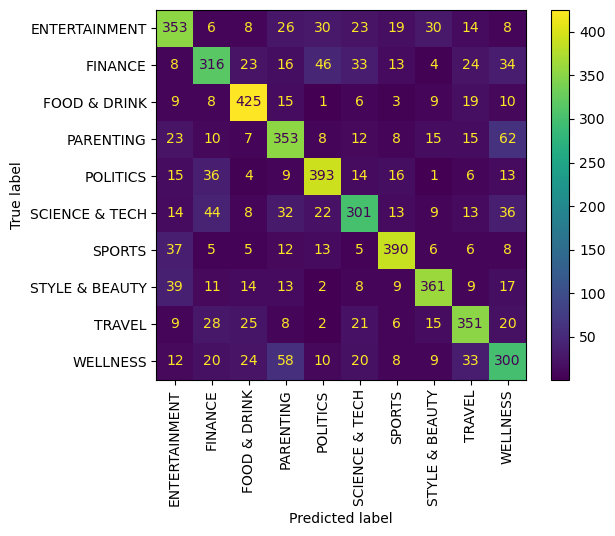

In [34]:
ConfusionMatrixDisplay.from_estimator(
    sgd_vec, test["tokens"], test["category"], xticks_rotation=90
)

----

## Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
mnb = make_pipeline(CountVectorizer(analyzer=identity), MultinomialNB())
mnb.fit(train["tokens"], train["category"])
print(classification_report(test["category"], mnb.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.7825    0.5358    0.6361       517
       FINANCE     0.6442    0.6093    0.6262       517
  FOOD & DRINK     0.8482    0.6970    0.7652       505
     PARENTING     0.5282    0.8031    0.6373       513
      POLITICS     0.7905    0.7890    0.7897       507
SCIENCE & TECH     0.8201    0.4817    0.6069       492
        SPORTS     0.8710    0.7207    0.7888       487
STYLE & BEAUTY     0.8188    0.7205    0.7665       483
        TRAVEL     0.6472    0.7979    0.7147       485
      WELLNESS     0.4953    0.7429    0.5943       494

      accuracy                         0.6892      5000
     macro avg     0.7246    0.6898    0.6926      5000
  weighted avg     0.7239    0.6892    0.6919      5000



In [37]:
%%time

search = RandomizedSearchCV(
    mnb,
    {
        "multinomialnb__alpha": loguniform(1e-7, 1.0),
        'multinomialnb__fit_prior': [True, False]
    },
    n_iter=30,
    n_jobs=-1,
    scoring="f1_macro",
)

search.fit(train["tokens"], train["category"])
search.best_params_

CPU times: user 10.8 s, sys: 91.9 ms, total: 10.9 s
Wall time: 14.5 s


{'multinomialnb__alpha': 0.2630551041894977, 'multinomialnb__fit_prior': True}

In [38]:
mnb.set_params(**search.best_params_)
mnb.fit(train["tokens"], train["category"])
print(classification_report(test["category"], mnb.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.7495    0.6654    0.7049       517
       FINANCE     0.6603    0.6054    0.6317       517
  FOOD & DRINK     0.8288    0.7762    0.8016       505
     PARENTING     0.5885    0.7388    0.6551       513
      POLITICS     0.7623    0.8284    0.7940       507
SCIENCE & TECH     0.7460    0.5671    0.6443       492
        SPORTS     0.8565    0.7844    0.8189       487
STYLE & BEAUTY     0.8117    0.7495    0.7793       483
        TRAVEL     0.7050    0.7835    0.7422       485
      WELLNESS     0.5690    0.6842    0.6213       494

      accuracy                         0.7178      5000
     macro avg     0.7277    0.7183    0.7193      5000
  weighted avg     0.7270    0.7178    0.7187      5000



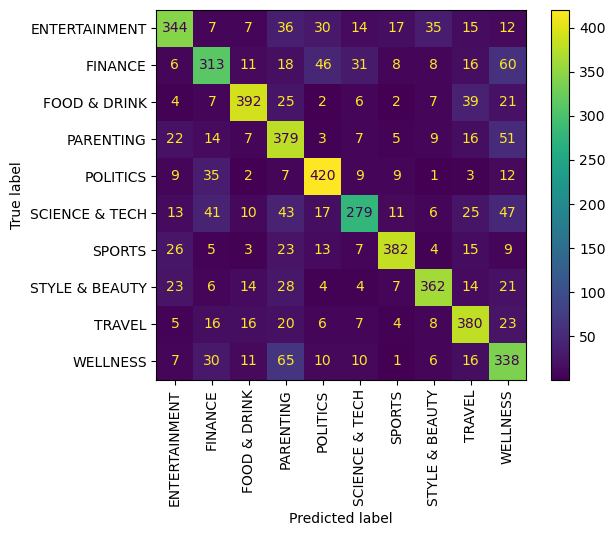

In [39]:
ConfusionMatrixDisplay.from_estimator(
    mnb, test["tokens"], test["category"], xticks_rotation=90
)

----

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model = make_pipeline(CountVectorizer(analyzer=identity), 
                          LogisticRegression(multi_class='auto', max_iter=2000, random_state=22))
log_model.fit(train["tokens"], train["category"])
print(classification_report(test["category"], log_model.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.6399    0.6944    0.6660       517
       FINANCE     0.5972    0.5706    0.5836       517
  FOOD & DRINK     0.7646    0.7782    0.7713       505
     PARENTING     0.6914    0.6901    0.6907       513
      POLITICS     0.7395    0.7613    0.7502       507
SCIENCE & TECH     0.6312    0.5915    0.6107       492
        SPORTS     0.7414    0.7947    0.7671       487
STYLE & BEAUTY     0.7878    0.7226    0.7538       483
        TRAVEL     0.7449    0.6804    0.7112       485
      WELLNESS     0.5758    0.6154    0.5949       494

      accuracy                         0.6896      5000
     macro avg     0.6914    0.6899    0.6900      5000
  weighted avg     0.6906    0.6896    0.6894      5000



In [42]:
%%time

search = RandomizedSearchCV(
    log_model,
    {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'logisticregression__fit_intercept': [True, False]
    },
    n_iter=10,
    scoring="f1_weighted",
)

search.fit(train["tokens"], train["category"])
search.best_score_, search.best_params_

CPU times: user 5min 24s, sys: 52.1 s, total: 6min 16s
Wall time: 4min 41s


(0.6993286708405052,
 {'logisticregression__solver': 'liblinear',
  'logisticregression__fit_intercept': False,
  'logisticregression__C': 1})

In [43]:
log_model.set_params(**search.best_params_)
log_model.fit(train["tokens"], train["category"])
print(classification_report(test["category"], log_model.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.7081    0.6615    0.6840       517
       FINANCE     0.6061    0.5745    0.5899       517
  FOOD & DRINK     0.7544    0.7663    0.7603       505
     PARENTING     0.6714    0.7368    0.7026       513
      POLITICS     0.7481    0.7732    0.7604       507
SCIENCE & TECH     0.6733    0.6159    0.6433       492
        SPORTS     0.8043    0.7598    0.7814       487
STYLE & BEAUTY     0.7812    0.7246    0.7519       483
        TRAVEL     0.7014    0.7361    0.7183       485
      WELLNESS     0.5625    0.6377    0.5977       494

      accuracy                         0.6982      5000
     macro avg     0.7011    0.6986    0.6990      5000
  weighted avg     0.7005    0.6982    0.6985      5000



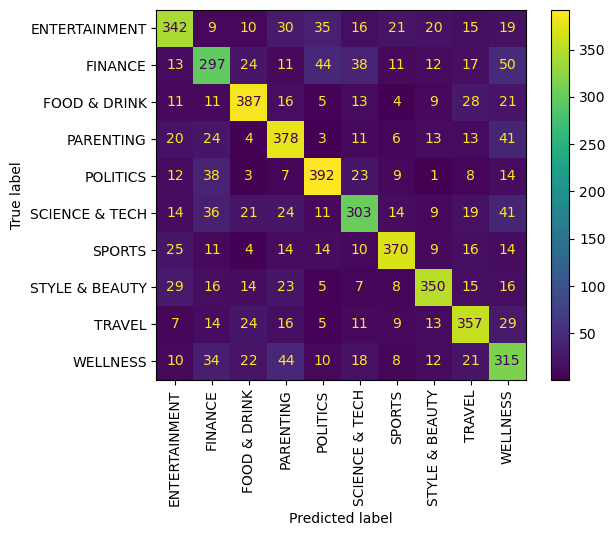

In [44]:
ConfusionMatrixDisplay.from_estimator(
    log_model, test["tokens"], test["category"], xticks_rotation=90
)

----

## SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm = make_pipeline(CountVectorizer(analyzer=identity), SVC())
svm.fit(train["tokens"], train["category"])
print(classification_report(test["category"],  svm.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.4403    0.6344    0.5198       517
       FINANCE     0.5304    0.4217    0.4698       517
  FOOD & DRINK     0.6387    0.6792    0.6583       505
     PARENTING     0.6237    0.5750    0.5984       513
      POLITICS     0.7703    0.6746    0.7192       507
SCIENCE & TECH     0.5090    0.4593    0.4829       492
        SPORTS     0.6301    0.6715    0.6501       487
STYLE & BEAUTY     0.8209    0.5694    0.6724       483
        TRAVEL     0.5373    0.5649    0.5508       485
      WELLNESS     0.4656    0.5486    0.5037       494

      accuracy                         0.5798      5000
     macro avg     0.5966    0.5799    0.5825      5000
  weighted avg     0.5958    0.5798    0.5821      5000



In [47]:
%%time 

search = RandomizedSearchCV(
    svm,
    {
        'svc__C': [0.0001, 0.001, 0.1, 1],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    },
    n_iter=10,
    n_jobs=-1,
    scoring="f1_macro",
)

search.fit(train["tokens"], train["category"])
search.best_params_

CPU times: user 24 s, sys: 268 ms, total: 24.2 s
Wall time: 5min 47s


{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': 0.1}

In [73]:
svm.set_params(**search.best_params_)
svm.fit(train["tokens"], train["category"])
print(classification_report(test["category"], svm.predict(test["tokens"]), digits=4))

                precision    recall  f1-score   support

 ENTERTAINMENT     0.5312    0.6925    0.6012       517
       FINANCE     0.5248    0.5126    0.5186       517
  FOOD & DRINK     0.7288    0.7505    0.7395       505
     PARENTING     0.6984    0.6862    0.6922       513
      POLITICS     0.7451    0.7554    0.7502       507
SCIENCE & TECH     0.5904    0.5508    0.5699       492
        SPORTS     0.7116    0.7700    0.7396       487
STYLE & BEAUTY     0.8020    0.6791    0.7354       483
        TRAVEL     0.7513    0.6165    0.6772       485
      WELLNESS     0.5571    0.5526    0.5549       494

      accuracy                         0.6566      5000
     macro avg     0.6641    0.6566    0.6579      5000
  weighted avg     0.6628    0.6566    0.6573      5000



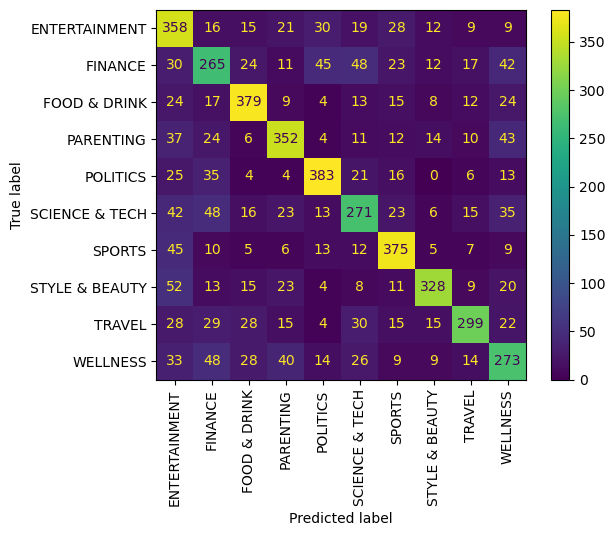

In [74]:
ConfusionMatrixDisplay.from_estimator(
    svm, test["tokens"], test["category"], xticks_rotation=90
)

----

# Topic Modeling

I decided to incorporate topic modeling using LDAModel with the goal of evaluating its ability to accurately classify words into appropriate topic clusters.

In [71]:
import tomotopy as tp

In [72]:
# LDAModel hyperparameters
k = 10
min_df = 20
rm_top = 60 
tw = tp.TermWeight.ONE
alpha = 0.1
eta = 0.01
tol = 1e-6

In [70]:
%%time

mdl = tp.LDAModel(k=k, min_df=min_df, rm_top=rm_top, tw=tw, alpha=alpha, eta=eta)

for doc in train["tokens"]:
    if doc:
        mdl.add_doc(doc)

mdl.train(0)
last = mdl.ll_per_word
print(f"{0:5d} LL = {last:8.4f}", flush=True)

for i in range(50, 5000, 50):
    mdl.train(50, workers=4)
    ll = mdl.ll_per_word
    print(f"{i:5d} LL = {ll:8.4f}", flush=True)
    if ll - last < tol:
        break
    else:
        last = ll

print(f"Done!")

    0 LL = -10.3150
   50 LL =  -7.6073
  100 LL =  -7.4703
  150 LL =  -7.4220
  200 LL =  -7.3978
  250 LL =  -7.3810
  300 LL =  -7.3693
  350 LL =  -7.3576
  400 LL =  -7.3333
  450 LL =  -7.3361
Done!
CPU times: user 5.93 s, sys: 130 ms, total: 6.06 s
Wall time: 2.99 s


In [67]:
", ".join(mdl.removed_top_words) # If there are any relevant words, rm_top most likely needs to be reduced

"the, to, a, of, and, in, 's, is, for, you, it, that, are, not, on, i, with, your, this, we, be, have, at, as, from, do, about, what, but, can, will, new, was, how, more, an, my, all, by, out, has, or, photos, when, they, our, up, their, just, if, her, time, like, his, day, who, there, most, he, so"

In [68]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.manifold import MDS, TSNE


def plot_topics(mdl, method="tsne", figsize=7):

    fig = plt.figure(figsize=(figsize, figsize))

    # x, y coords
    term_topics_dist = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
    if method == "mds":
        dist = distance.squareform(distance.pdist(term_topics_dist, "jensenshannon"))
        coords = MDS(2, dissimilarity="precomputed").fit_transform(dist)
    elif method == "tsne":
        if mdl.k <= 20:
            p = mdl.k - 1
        else:
            p = 20
        coords = TSNE(
            2,
            metric=distance.jensenshannon,
            perplexity=p,
            init="pca",
            learning_rate="auto",
            n_jobs=-1,
        ).fit_transform(term_topics_dist)
    else:
        raise ValueError(f"Method {method} unknown")

    # size of the circle
    doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
    doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
    words_per_topic = np.dot(doc_topic_dists.T, doc_lengths)
    topic_percent = words_per_topic / words_per_topic.sum()
    sizes = topic_percent * (figsize * fig.dpi) * (figsize * fig.dpi) * (0.25 / 3.14)

    # draw it
    plt.scatter(coords[:, 0], coords[:, 1], s=sizes, alpha=0.3)
    for i in range(mdl.k):
        plt.text(coords[i, 0], coords[i, 1], i, ha="center", va="center")

        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

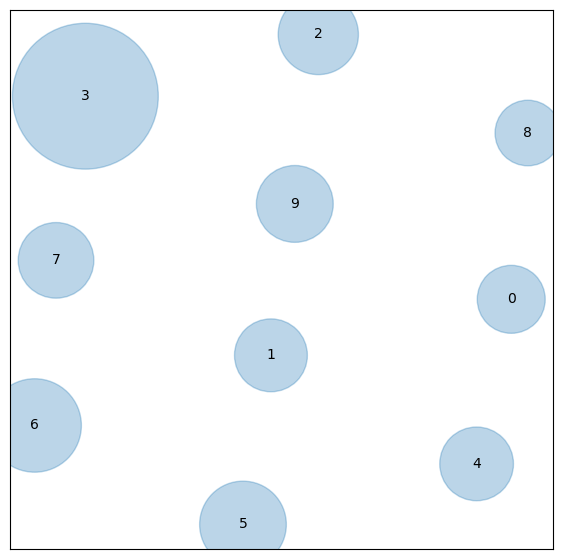

In [69]:
plot_topics(mdl)

List topic words

In [90]:
for k in range(mdl.k):
    print(f"{k:3d} ", ", ".join(s for s, _ in mdl.get_topic_words(k)))

  0  trump, donald, president, said, obama, house, says, clinton, white, bill
  1  $, year, u.s, apple, last, week, tax, its, company, news
  2  best, world, food, travel, summer, city, around, top, america, trip
  3  make, us, get, people, way, these, life, know, than, good
  4  may, health, could, study, women, business, people, than, social, care
  5  video, after, game, star, watch, world, night, over, during, team
  6  week, style, fashion, look, twitter, check, huffpost, facebook, photo, sure
  7  kids, she, am, me, parents, children, had, old, year, school
  8  super, holiday, bowl, tips, year, off, here, travel, season, black


In [78]:
%%time

docs = [mdl.make_doc(words=toks) for toks in test["tokens"]]
topic_dist, ll = mdl.infer(docs)
topics = [d.get_topic_dist() for d in docs]

CPU times: user 706 ms, sys: 5.1 ms, total: 711 ms
Wall time: 246 ms


In [79]:
mdl.save("news-topics.bin") # Save model

Create labels and save to CSV

In [80]:
topic_words = [[x for x, _ in mdl.get_topic_words(i)] for i in range(mdl.k)]
topics = pd.DataFrame(
    {
        "label": [x[0].upper() for x in topic_words],
        "words": [", ".join(x) for x in topic_words],
    }
)
topics.to_csv("labels.csv", index=False)

In [81]:
labels = list(pd.read_csv("labels.csv")["label"])

In [82]:
test["docs"] = [mdl.make_doc(words=toks) for toks in test["tokens"]]
topic_dist, ll = mdl.infer(test["docs"])

In [83]:
test["topics"] = [
    [labels[t] for t in map(first, d.get_topics(3))] for d in test["docs"]
]

In [84]:
from collections import Counter, defaultdict

In [85]:
topic_freq = Counter(concat(test["topics"]))
topic_freq.most_common()

[('MAKE', 4069),
 ('KIDS', 2594),
 ('VIDEO', 2139),
 ('MAY', 1656),
 ('BEST', 1313),
 ('$', 1201),
 ('TRUMP', 880),
 ('WEEK', 756),
 ('SUPER', 392)]